In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Load Data

## Load and prepare clinical data

In [2]:
with open("data/SwissSamples.json", "r") as f:
    swiss_samples = json.load(f)
df1 = pd.DataFrame(swiss_samples["data"])
df1.head()

,division,date,count
0,Aargau,2021-09-12,27
1,Ticino,2021-07-20,15
2,Aargau,2020-10-26,3
3,Basel-Land,2020-07-06,1
4,Geneva,2021-10-09,16


In [3]:
with open("data/SwissDeltaSamples.json", "r") as f:
    swiss_delta_samples = json.load(f)
df2 = pd.DataFrame(swiss_delta_samples["data"])
df2.head()

,division,date,count
0,Aargau,2021-09-12,27
1,Ticino,2021-07-20,15
2,Geneva,2021-10-09,16
3,Geneva,2021-07-09,18
4,Ticino,2021-11-20,10


In [4]:
clinical_df = df1.merge(df2, on=["division", "date"], suffixes=["", "_delta"], how="outer")
clinical_df = clinical_df.fillna(0.0)
clinical_df.head()

,division,date,count,count_delta
0,Aargau,2021-09-12,27,27.0
1,Ticino,2021-07-20,15,15.0
2,Aargau,2020-10-26,3,0.0
3,Basel-Land,2020-07-06,1,0.0
4,Geneva,2021-10-09,16,16.0


In [5]:
clinical_df["date"] = pd.to_datetime(clinical_df["date"])
clinical_df["frac"] = clinical_df["count_delta"] / clinical_df["count"]

In [6]:
subs_divisions = ["Ticino", "Bern", "Zürich", "Graubünden", "Vaud", "Sankt Gallen"]
# subs_divisions = ["Ticino", "Bern"]

clinical_df_filt = clinical_df[clinical_df.division.isin(subs_divisions)]

## Load and prepare clinical data by lab

In [7]:
with open("data/SwissSamples_bylab3.json", "r") as f:
    swiss_samples_bylab = json.load(f)
df1_bylab = pd.DataFrame(swiss_samples_bylab["data"])
df1_bylab.head()

,division,date,dateSubmitted,originatingLab,count
0,Ticino,2021-12-07,2021-12-21,Viollier AG,1
1,Vaud,2021-04-26,2021-05-07,EHNV,1
2,Sankt Gallen,2021-09-20,2021-10-12,Viollier AG,15
3,Vaud,2020-10-01,2020-10-30,Viollier AG,10
4,Aargau,2021-11-30,2021-12-14,Kantonsspital Baden AG,1


In [8]:
with open("data/SwissDeltaSamples_bylab3.json", "r") as f:
    swiss_delta_samples_bylab = json.load(f)
df2_bylab = pd.DataFrame(swiss_delta_samples_bylab["data"])
df2_bylab.head()

,division,date,dateSubmitted,originatingLab,count
0,Ticino,2021-12-07,2021-12-21,Viollier AG,1
1,Sankt Gallen,2021-09-20,2021-10-12,Viollier AG,15
2,Aargau,2021-11-30,2021-12-14,Kantonsspital Baden AG,1
3,Bern,2021-08-28,2021-09-22,Hopital du Jura: Delemont,1
4,Vaud,2021-12-07,2021-12-18,CHUV,3


In [9]:
clinical_df_bylab = df1_bylab.merge(df2_bylab, on=["division", "date", "dateSubmitted", "originatingLab"], suffixes=["", "_delta"], how="outer")
clinical_df_bylab = clinical_df_bylab.fillna(0.0)
clinical_df_bylab.head()

,division,date,dateSubmitted,originatingLab,count,count_delta
0,Ticino,2021-12-07,2021-12-21,Viollier AG,1,1.0
1,Vaud,2021-04-26,2021-05-07,EHNV,1,0.0
2,Sankt Gallen,2021-09-20,2021-10-12,Viollier AG,15,15.0
3,Vaud,2020-10-01,2020-10-30,Viollier AG,10,0.0
4,Aargau,2021-11-30,2021-12-14,Kantonsspital Baden AG,1,1.0


In [10]:
clinical_df_bylab["date"] = pd.to_datetime(clinical_df_bylab["date"])
clinical_df_bylab["dateSubmitted"] = pd.to_datetime(clinical_df_bylab["dateSubmitted"])
clinical_df_bylab["frac"] = clinical_df_bylab["count_delta"] / clinical_df_bylab["count"]

In [11]:
clinical_df_bylab_filt = clinical_df_bylab[clinical_df_bylab.division.isin(subs_divisions)]

In [12]:
clinical_df_bylab.head()

,division,date,dateSubmitted,originatingLab,count,count_delta,frac
0,Ticino,2021-12-07,2021-12-21,Viollier AG,1,1.0,1.0
1,Vaud,2021-04-26,2021-05-07,EHNV,1,0.0,0.0
2,Sankt Gallen,2021-09-20,2021-10-12,Viollier AG,15,15.0,1.0
3,Vaud,2020-10-01,2020-10-30,Viollier AG,10,0.0,0.0
4,Aargau,2021-11-30,2021-12-14,Kantonsspital Baden AG,1,1.0,1.0


### Split by sampling delay

In [13]:
delay = pd.to_timedelta(30, "days")
clinical_df_bylab_filt["delayed"] = (clinical_df_bylab_filt.dateSubmitted - clinical_df_bylab_filt.date) > delay

/var/folders/yt/sy9k0v5j5614lbn7g01dkf6r0000gn/T/ipykernel_17646/3133324877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_df_bylab_filt["delayed"] = (clinical_df_bylab_filt.dateSubmitted - clinical_df_bylab_filt.date) > delay


## Load and prepare wastewater data

## Load cooc data 

In [14]:
cooc_df = pd.read_csv("data/df_cooc_short.csv")
cooc_df.date = pd.to_datetime(cooc_df.date)
cooc_df.head()

,Unnamed: 0,plantname,date,batch,sample,amplicon,frac,cooc,count,mut_all,...,BR,EU,UK,ZA,IN2,IN1,IN3,AY42,mu,om
0,0,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,71,NaN,NaN,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,95,0.0,2.0,17260,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,77,NaN,NaN,0,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,72,NaN,NaN,0,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,78,NaN,NaN,0,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cooc_df_delta = cooc_df[cooc_df["IN2"] == 1]
cooc_df_delta["detected"] = (cooc_df_delta["mut_all"] > 4) * 1.0
cooc_df_delta.head()

/var/folders/yt/sy9k0v5j5614lbn7g01dkf6r0000gn/T/ipykernel_17646/1921067210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cooc_df_delta["detected"] = (cooc_df_delta["mut_all"] > 4) * 1.0


,Unnamed: 0,plantname,date,batch,sample,amplicon,frac,cooc,count,mut_all,...,EU,UK,ZA,IN2,IN1,IN3,AY42,mu,om,detected
9,9,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,91,NaN,NaN,0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
11,11,Lugano (TI),2021-12-01,20211217_HVTWGDRXY,05_2021_12_01,76,NaN,NaN,0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.0
29,29,Lugano (TI),2021-12-02,20211217_HVTWGDRXY,05_2021_12_02,91,NaN,NaN,0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
31,31,Lugano (TI),2021-12-02,20211217_HVTWGDRXY,05_2021_12_02,76,NaN,NaN,0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.0
49,49,Lugano (TI),2021-12-03,20211217_HVTWGDRXY,05_2021_12_03,91,NaN,NaN,0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0


In [16]:
names_dict = {
    "Ticino":"Lugano (TI)",
    "Bern":"Laupen (BE)",
    "Zürich":"Zürich (ZH)",
    "Graubünden":"Chur (GR)",
    "Basel-Stadt":"Basel (catchment area ARA Basel)",
    "Vaud":"Lausanne (VD)",
    "Sankt Gallen":"Altenrhein (SG)"
}
names_dict_rev = dict([(names_dict[k],k) for k in names_dict.keys()])

In [17]:
cooc_df_delta = cooc_df_delta[cooc_df_delta.plantname.isin(names_dict.values())]
cooc_df_delta["division"] = [names_dict_rev[i] for i in cooc_df_delta["plantname"].values]

# Plot

## Do one figure with all Viollier filtered sequences

Lugano (TI) (Apr. 2021 - Sep. 2021)
Laupen (BE) (Jun. 2021 - Sep. 2021)
Zürich (ZH) (May. 2021 - Sep. 2021)
Chur (GR) (Jul. 2021 - Sep. 2021)
Lausanne (VD) (Feb. 2021 - Jul. 2021)
Altenrhein (SG) (Jun. 2021 - Sep. 2021)


/var/folders/yt/sy9k0v5j5614lbn7g01dkf6r0000gn/T/ipykernel_17646/627825298.py:111: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines,


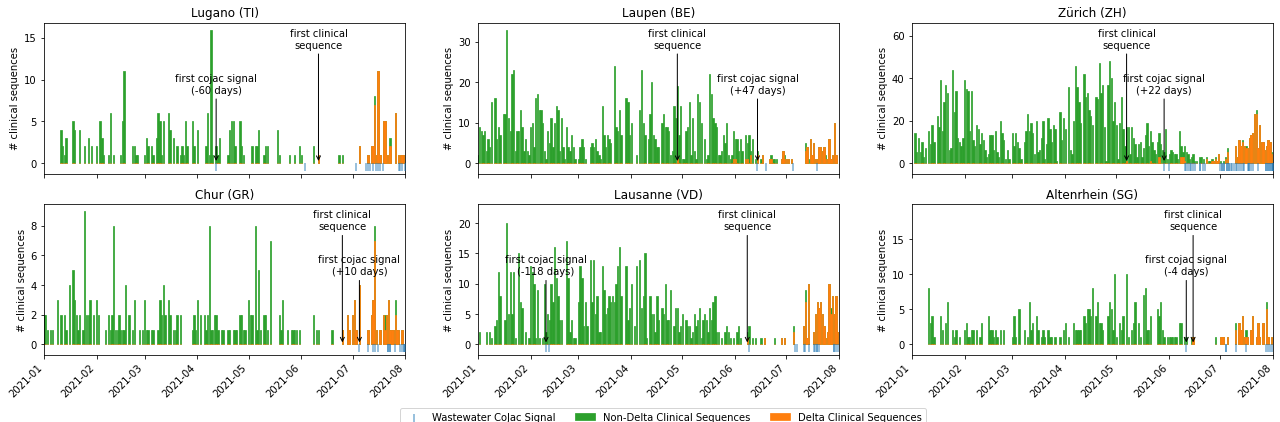

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24*0.85*1.2*0.9, 8*0.85*0.9), sharex=True, sharey=False)
# axes = axes.reshape(-1)
axes = axes.flat

locnames = ["Lugano (TI)", "Laupen (BE)", "Zürich (ZH)", "Chur (GR)", "Lausanne (VD)", "Altenrhein (SG)"]

for i, division in enumerate(subs_divisions):    
    # prepare data
    
    clinical_df_temp = clinical_df_filt[clinical_df_filt["division"]==division]
    clinical_df_temp = clinical_df_temp[clinical_df_temp.date >= np.datetime64("2021-01-01")]
    clinical_df_temp = clinical_df_temp[clinical_df_temp.date < np.datetime64("2021-10-01")]
    clinical_df_temp["rollmean"] = clinical_df_temp.sort_values("date").frac.rolling(7).mean()
    
    clinical_df_temp_all = clinical_df_bylab_filt.groupby(["division", "date"]).agg("sum").reset_index()
    clinical_df_temp_all = clinical_df_temp_all[clinical_df_temp_all["division"]==division]
    clinical_df_temp_all = clinical_df_temp_all[clinical_df_temp_all.date >= np.datetime64("2021-01-01")]
    clinical_df_temp_all = clinical_df_temp_all[clinical_df_temp_all.date < np.datetime64("2021-10-01")]
    clinical_df_temp_all["rollmean"] = clinical_df_temp_all.sort_values("date").frac.rolling(7).mean()
    
    clinical_df_temp_delayed = clinical_df_bylab_filt[clinical_df_bylab_filt["delayed"] == False]
    clinical_df_temp_delayed = clinical_df_temp_delayed.groupby(["division", "date"]).agg("sum").reset_index()
    clinical_df_temp_delayed = clinical_df_temp_delayed[clinical_df_temp_delayed["division"]==division]
#     clinical_df_temp_delayed = clinical_df_temp_delayed[clinical_df_temp_delayed["delayed"] == False]
    clinical_df_temp_delayed = clinical_df_temp_delayed[clinical_df_temp_delayed.date >= np.datetime64("2021-01-01")]
    clinical_df_temp_delayed = clinical_df_temp_delayed[clinical_df_temp_delayed.date < np.datetime64("2021-10-01")]
    clinical_df_temp_delayed["rollmean"] = clinical_df_temp_delayed.sort_values("date").frac.rolling(7).mean()
    
    clinical_df_temp_delayed_viollier = clinical_df_bylab_filt[clinical_df_bylab_filt["delayed"] == False]
    clinical_df_temp_delayed_viollier = clinical_df_temp_delayed_viollier[clinical_df_temp_delayed_viollier.originatingLab.str.startswith("Viollier").fillna(False)]
    clinical_df_temp_delayed_viollier = clinical_df_temp_delayed_viollier.groupby(["division", "date"]).agg("sum").reset_index()
    clinical_df_temp_delayed_viollier = clinical_df_temp_delayed_viollier[clinical_df_temp_delayed_viollier["division"]==division]
#     clinical_df_temp_delayed = clinical_df_temp_delayed[clinical_df_temp_delayed["delayed"] == False]
    clinical_df_temp_delayed_viollier = clinical_df_temp_delayed_viollier[clinical_df_temp_delayed_viollier.date >= np.datetime64("2021-01-01")]
    clinical_df_temp_delayed_viollier = clinical_df_temp_delayed_viollier[clinical_df_temp_delayed_viollier.date < np.datetime64("2021-10-01")]
    clinical_df_temp_delayed_viollier["rollmean"] = clinical_df_temp_delayed_viollier.sort_values("date").frac.rolling(7).mean()
    
    cooc_df_delta_temp = cooc_df_delta[(cooc_df_delta["division"]==division) & (cooc_df_delta["mut_all"]>=5)]
    cooc_df_delta_temp = cooc_df_delta_temp[cooc_df_delta_temp.date >= np.datetime64("2021-01-01")]
    cooc_df_delta_temp = cooc_df_delta_temp[cooc_df_delta_temp.date < np.datetime64("2021-10-01")]
    
#     # Scatters of freqs
#     sns.lineplot(data=clinical_df_temp,
#                  x="date", y="rollmean", ax=axes[0,0], color="C1")

#     var_df_temp = var_df[(var_df["division"]==division) & (var_df["variant"]=="B.1.617.2")]
#     var_df_temp = var_df_temp[var_df_temp.date >= np.datetime64("2021-01-01")]
#     var_df_temp = var_df_temp[var_df_temp.date < np.datetime64("2021-10-01")]
#     sns.lineplot(data=var_df_temp,
#                  x="date", y="proportion", ax=axes[0,0], color="C0")
    
#     sns.scatterplot(x = cooc_df_delta_temp["date"], 
#                     y = 0.02, markers = "X", ax=axes[0,0])

#     fig.suptitle(division, fontsize=16)
#     axes[0,0].set_ylabel("estimated fraction")
#     axes[0,0].legend(labels=["clinical (7-day average)", "wastewater (loess smoothed)", "cojac cooccurrences"])

    
    # barplots of Viollier only clinical sequences without retrospective sequencing   
    axes[i].bar(x=clinical_df_temp_delayed_viollier.date, 
                    height=clinical_df_temp_delayed_viollier["count"],
               edgecolor="C2", color="C2", linewidth=0.72)
    axes[i].bar(x=clinical_df_temp_delayed_viollier.date, 
                    height=clinical_df_temp_delayed_viollier["count_delta"],
               edgecolor="C1", color="C1", linewidth=0.72)
    axes[i].set_ylabel("# clinical sequences")
    
    time_clinical = clinical_df_temp_delayed_viollier[clinical_df_temp_delayed_viollier.count_delta > 0].date.min()
    time_cojac = cooc_df_delta[(cooc_df_delta["division"]==division) & (cooc_df_delta["mut_all"]>=5)].date.min()

    axes[i].annotate("first clinical\nsequence",
                xy=(time_clinical, 0),
                     xycoords='data',
                xytext=(0, 115), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"), ha='center',
                )
    axes[i].annotate("first cojac signal\n({:+} days)".format((time_cojac - time_clinical).days),
                xy=(time_cojac, 0), xycoords='data',
                xytext=(0, 70), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"), ha='center',
                )
#     sns.scatterplot(x = cooc_df_delta_temp["date"], 
#                     y = 0.02, markers = "X", ax=axes[i])
    marker_pos = -0.03 * clinical_df_temp_delayed_viollier["count"].max()
    axes[i].scatter(cooc_df_delta_temp["date"], cooc_df_delta_temp["date"].shape[0] * [marker_pos],
                    zorder=10, marker = "|", alpha=0.6, s=60)
    
#     axes[i].legend(labels=["Wastewater CoJac Signal", "Non-Delta Clinical Sequences", "Delta Clinical Sequences"], loc="upper left")

    
    axes[i].set_title(locnames[i])
    axes[i].set_xlim([np.datetime64("2021-01-01"), np.datetime64("2021-08-01")])

#     axes[i].text(-0.1, 1.1, ["A", "B", "C", "D", "E", "F"][i], transform=axes[i].transAxes, 
#                  size=20, weight='bold')
    
    print('{} ({} - {})'.format(locnames[i],
                              cooc_df_delta_temp["date"].min().strftime('%b. %Y'),
                              cooc_df_delta_temp["date"].max().strftime('%b. %Y')))
#     labels = axes[i].get_xticklabels()
#     axes[i].set_xticklabels(labels, rotation=45, ha='right')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines,
           labels=["Wastewater CoJac Signal", "Non-Delta Clinical Sequences", "Delta Clinical Sequences"],
           loc=(0.312, -0.01), ncol=3)


plt.savefig("plots/fullplot_wide.pdf")
plt.savefig("plots/fullplot_wide.jpeg", dpi=200)

plt.show()

# Resampling

In [19]:

def blow_up_df(t_df):
    """duplicate rows of dates in terms of counts"""
    lst1 = []
    for idx, i in t_df.iterrows():
        for j in range(int(i["count"] - i["count_delta"])):
            lst1.append((i["date"], "WT"))
        for j in range(int(i["count_delta"])):
            lst1.append((i["date"], "Delta"))
    return pd.DataFrame(lst1, columns=["date", "variant"])

def subsample_df(t_df_blow, count=1):
    return t_df_blow.iloc[np.random.choice(t_df_blow.shape[0], size=count, replace=False),:]


In [20]:
def do_subsamp(t_df_blow, sizes=[10, 100, 500], reps=100):
    out = []
    for size in sizes:
        for r in range(reps):
            sub_df = subsample_df(t_df_blow, size)
            out.append((sub_df[sub_df.variant=="Delta"].date.min(), size))   
    return pd.DataFrame(out, columns=["date", "size"])

In [21]:
np.random.seed(42)
sizes=[10, 50, 100, 250, 500]
reps=100
out = []
for division in clinical_df_bylab_filt.division.unique():
    t_df = clinical_df_bylab_filt[clinical_df_bylab_filt.division == division]
    t_df = t_df[t_df.delayed == False]
    t_df = t_df[t_df.originatingLab == "Viollier AG"]
    t_df_blow = blow_up_df(t_df)
    time_cojac = cooc_df_delta[(cooc_df_delta["division"]==division) & (cooc_df_delta["mut_all"]>=5)].date.min()
    sizes=np.arange(50, t_df_blow.shape[0], 50)
    for size in sizes:
        for r in range(reps):
            sub_df = subsample_df(t_df_blow, size)
            out.append((sub_df[sub_df.variant=="Delta"].date.min(),
                        (sub_df[sub_df.variant=="Delta"].date.min() - time_cojac)/np.timedelta64(1, 'D'),
                        size,
                        division))   
df_subs = pd.DataFrame(out, columns=["date", "date_diff", "size", "division"])

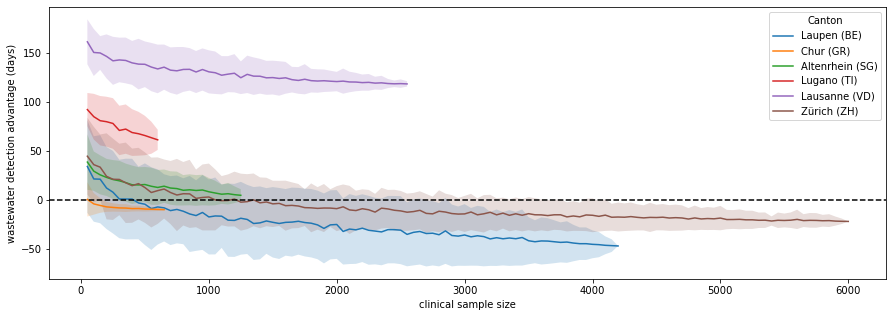

In [22]:
agg_df1 = df_subs.groupby(["division", "size"])["date_diff"].agg(mean="mean", std="std").reset_index()
agg_df1

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=agg_df1, x="size", y="mean", hue="division", ax=ax)

for city in agg_df1.division.unique():
    tt_df = agg_df1[agg_df1["division"]==city]
    ax.fill_between(tt_df["size"], tt_df["mean"] - 1.96*tt_df["std"], tt_df["mean"] + 1.96*tt_df["std"], alpha=0.2)

# ax.set_xscale('log')
ax.axhline(y = 0, color="black", linestyle = '--')
ax.set_ylabel("wastewater detection advantage (days)")
ax.set_xlabel("clinical sample size")
plt.legend(title='Canton', loc='upper right', labels=[locnames[i] for i in [1, 3, 5, 0, 4, 2]])
plt.savefig("plots/resample_plot.pdf")
plt.savefig("plots/resample_plot.jpeg", dpi=200)

plt.show()
